# Ονοματεπώνυμα και ΑΜ
# Παντελεήμων Μαλέκας 1115201600268
# Θεοφάνης Μπιρμπίλης 1115201600110

#  

# Introduction: Creating the tsv files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
import os


#Getting the name of the directory with our data.
dir_name = 'fulltext\data/'

#Getting every folder of the fulltext directory.
folder_entries = os.listdir(dir_name)
os.listdir(dir_name)

#Initializing a dataframe which will contain all of our data
train_test = pd.DataFrame(columns=['id', 'title', 'content', 'category'])

#Counter used for the ids
count = 0

#For every folder in the fulltext directory.
for filename in os.listdir(dir_name):
    
    #Skipping the readme file
    if filename == 'README.TXT':
        continue
    else:
        
        #For every file in the folder
        nested_dir = dir_name + filename
        for txt_file in os.listdir(nested_dir):
            count += 1
            open_file = nested_dir + '/' + txt_file
            
            #First line is the title, and the rest are its contents
            with open(open_file) as f:
                first_line = f.readline()
                content = ''
                for line in f:
                    content = content + line
            
            #Adding our information in the dataframe
            train_test = train_test.append({'id': count, 'title': first_line, 'content': content, 'category': filename }, ignore_index=True)

#Splitting the main dataframe to training and test sets.            
train_set, test_set = train_test_split(train_test , test_size=0.2, stratify=train_test['category'])

#Writing to the tsv file
train_set.to_csv('train_set.tsv', sep = '\t')

#Keeping the category of the test set, for later. And deleting from the test_set.tsv file.
Test_Y = test_set['category'] 
del test_set['category']

#Writing to the tsv file
test_set.to_csv('test_set.tsv', sep = '\t')


#  

# Question 1: Wordclouds of each category

politics:


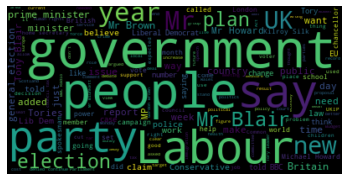

business:


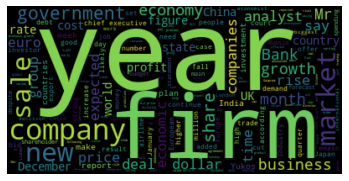

tech:


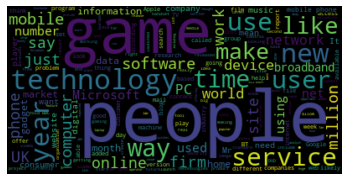

sport:


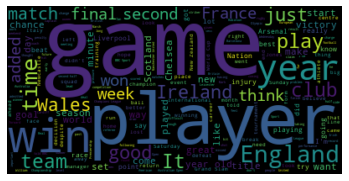

entertainment:


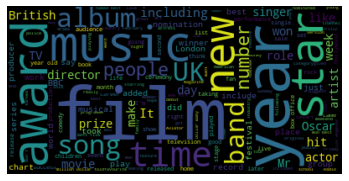

In [2]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

#Getting the path of the training set.
train_path = r'C:\Users\Pantelis\Documents\uni\tede\Second\train_set.tsv'
train_df = pd.read_csv(train_path, sep='\t')

#Adding some stop words
our_words = 'said will'.split()
our_stopwords = ENGLISH_STOP_WORDS.union(our_words)

#Generating a wordcloud for each category.
categories = train_df.category.unique()
for category in categories:
    
    print(category+':')
    
    #Getting a unique string of 'content' column so it can be passed to WordCloud().generate()
    content_values = train_df[train_df.category == category].content.values
    wc_text = ' '.join(content_values)
    
    #Displaying the wordcloud image. 
    wordcloud = WordCloud(stopwords=our_stopwords).generate(wc_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

#  

# Question 2: Classification

# Preparing our data

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score

#Encoding the labels we have.
Encoder = LabelEncoder() 
Train_Y = Encoder.fit_transform(train_df["category"])
Test_Y = Encoder.fit_transform(Test_Y)

#Getting the path of the test set.
test_path = r'C:\Users\Pantelis\Documents\uni\tede\Second\test_set.tsv'
test_df = pd.read_csv(test_path, sep='\t')

#Creating the tf-idf and bag-of-words representations we need.
tfidf = TfidfVectorizer()
tfs_train = tfidf.fit_transform(train_df['content'])
tfs_test = tfidf.transform(test_df['content'])

count_vectorizer = CountVectorizer()
counts_train = count_vectorizer.fit_transform(train_df['content'])
counts_test = count_vectorizer.transform(test_df['content'])



#  

# Classifier 1: Support Vector Machines

# TF-IDF representation

Printing scores for 10-fold cross validation.
Average accuracy using SVM with 10-fold cross validation : 88.6%
Average accuracy using SVM with 10-fold cross validation and precision : 91.05%
Average accuracy using SVM with 10-fold cross validation and recall : 88.6%
Average accuracy using SVM with 10-fold cross validation and f1 measure: 88.48%
Average accuracy using SVM with 10-fold cross validation and roc score : 99.66%


Printing scores for predictions on the test set.
Average accuracy using SVM: 93.26%
Average accuracy using SVM and precision : 94.12%
Average accuracy using SVM and recall : 93.26%
Average accuracy using SVM and f1 measure: 93.25%
ROC plot for the predictions:


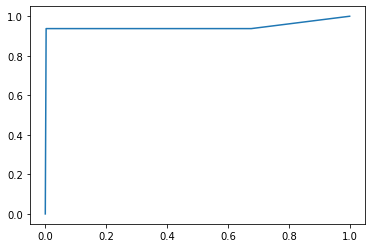

AUC: 94.63%


In [5]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


#Initializing the SVM object and tweaking the C, kernel and gamma parameters to achieve higher accuracy.
SVM = svm.SVC(C=0.1, kernel='linear',gamma=0.001,probability=True)

#Fitting the training data
SVM.fit(tfs_train,Train_Y)


#First print the scores for 10-fold cross validation on the training dataset.



print("Printing scores for 10-fold cross validation.")

cv = np.mean(cross_val_score(SVM, tfs_train, Train_Y, cv=10, scoring = 'accuracy'))
print ("Average accuracy using SVM with 10-fold cross validation : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, tfs_train, Train_Y, cv=10, scoring = 'precision_weighted'))
print ("Average accuracy using SVM with 10-fold cross validation and precision : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, tfs_train, Train_Y, cv=10, scoring = 'recall_weighted'))
print ("Average accuracy using SVM with 10-fold cross validation and recall : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, tfs_train, Train_Y, cv=10, scoring = 'f1_weighted'))
print ("Average accuracy using SVM with 10-fold cross validation and f1 measure: {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, tfs_train, Train_Y, cv=10, scoring = 'roc_auc_ovr_weighted'))
print ("Average accuracy using SVM with 10-fold cross validation and roc score : {}%".format(round(cv*100,2)))


#Predict the labels on the test set.
predictions_SVM = SVM.predict(tfs_test)


#Now print the scores for the predictions on the test set.

print("\n")
print("Printing scores for predictions on the test set.")

acc_score_test = accuracy_score(Test_Y, predictions_SVM)
print ("Average accuracy using SVM: {}%".format(round(acc_score_test*100,2)))

prec_score_test = precision_score(Test_Y, predictions_SVM, average = 'weighted')
print ("Average accuracy using SVM and precision : {}%".format(round(prec_score_test*100,2)))

rec_score_test = recall_score(Test_Y, predictions_SVM, average = 'weighted')
print ("Average accuracy using SVM and recall : {}%".format(round(rec_score_test*100,2)))

f1_score_test = f1_score(Test_Y, predictions_SVM, average = 'weighted')
print ("Average accuracy using SVM and f1 measure: {}%".format(round(f1_score_test*100,2)))


print("ROC plot for the predictions:")

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_SVM, pos_label=4)

#Plot ROC curve
plt.plot(fpr,tpr)
plt.show() 

#Print AUC score
auc = np.trapz(tpr,fpr)
print('AUC: {}%'.format(round(auc*100,2))) 


#  Bag of words representation

Printing scores for 10-fold cross validation.
Average accuracy using SVM with 10-fold cross validation : 96.52%
Average accuracy using SVM with 10-fold cross validation and precision : 96.62%
Average accuracy using SVM with 10-fold cross validation and recall : 96.52%
Average accuracy using SVM with 10-fold cross validation and f1 measure: 96.5%
Average accuracy using SVM with 10-fold cross validation and roc score : 99.67%


Printing scores for predictions on the test set.
Average accuracy using SVM: 95.96%
Average accuracy using SVM and precision : 95.98%
Average accuracy using SVM and recall : 95.96%
Average accuracy using SVM and f1 measure: 95.94%
ROC plot for the predictions:


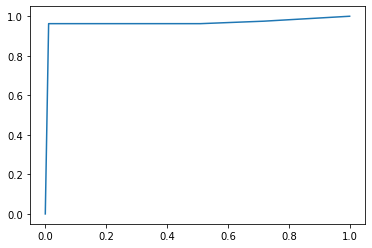

AUC: 96.56%


In [6]:
#Initializing the SVM object and tweaking the C, kernel and gamma parameters to achieve higher accuracy.
SVM = svm.SVC(C=0.1, kernel='linear',gamma=0.001,probability=True)

#Fitting the training data
SVM.fit(counts_train,Train_Y)


#First print the scores for 10-fold cross validation on the training dataset.



print("Printing scores for 10-fold cross validation.")

cv = np.mean(cross_val_score(SVM, counts_train, Train_Y, cv=10, scoring = 'accuracy'))
print ("Average accuracy using SVM with 10-fold cross validation : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, counts_train, Train_Y, cv=10, scoring = 'precision_weighted'))
print ("Average accuracy using SVM with 10-fold cross validation and precision : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, counts_train, Train_Y, cv=10, scoring = 'recall_weighted'))
print ("Average accuracy using SVM with 10-fold cross validation and recall : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, counts_train, Train_Y, cv=10, scoring = 'f1_weighted'))
print ("Average accuracy using SVM with 10-fold cross validation and f1 measure: {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, counts_train, Train_Y, cv=10, scoring = 'roc_auc_ovr_weighted'))
print ("Average accuracy using SVM with 10-fold cross validation and roc score : {}%".format(round(cv*100,2)))


#Predict the labels on the test set.
predictions_SVM = SVM.predict(counts_test)


#Now print the scores for the predictions on the test set.

print("\n")
print("Printing scores for predictions on the test set.")

acc_score_test = accuracy_score(Test_Y, predictions_SVM)
print ("Average accuracy using SVM: {}%".format(round(acc_score_test*100,2)))

prec_score_test = precision_score(Test_Y, predictions_SVM, average = 'weighted')
print ("Average accuracy using SVM and precision : {}%".format(round(prec_score_test*100,2)))

rec_score_test = recall_score(Test_Y, predictions_SVM, average = 'weighted')
print ("Average accuracy using SVM and recall : {}%".format(round(rec_score_test*100,2)))

f1_score_test = f1_score(Test_Y, predictions_SVM, average = 'weighted')
print ("Average accuracy using SVM and f1 measure: {}%".format(round(f1_score_test*100,2)))


print("ROC plot for the predictions:")

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_SVM, pos_label=4)

plt.plot(fpr,tpr)
plt.show() 

auc = np.trapz(tpr,fpr)
print('AUC: {}%'.format(round(auc*100,2))) 


#  

# Classifier 2: Random Forests

# TF-IDF representation

Printing scores for 10-fold cross validation.
Average accuracy using Random Forests with 10-fold cross validation : 95.06%
Average accuracy using Random Forests with 10-fold cross validation and precision : 95.7%
Average accuracy using Random Forests with 10-fold cross validation and recall : 95.84%
Average accuracy using Random Forests with 10-fold cross validation and f1 measure: 96.06%
Average accuracy using Random Forests with 10-fold cross validation and roc score : 99.69%


Printing scores for predictions on the test set.
Average accuracy using Random Forests: 97.08%
Average accuracy using Random Forests and precision : 97.13%
Average accuracy using Random Forests and recall : 97.08%
Average accuracy using Random Forests and f1 measure: 97.08%
ROC plot for the predictions:


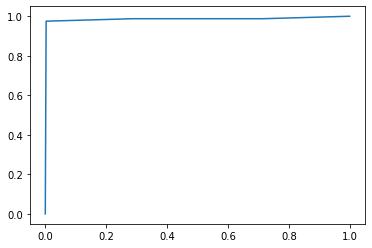

AUC: 98.61%


In [14]:
from sklearn.ensemble import RandomForestClassifier

#Initializing the RF object.
RF = RandomForestClassifier(n_estimators=100)

#Fitting the training data.
RF.fit(tfs_train,Train_Y)


#First print the scores for 10-fold cross validation on the training dataset.



print("Printing scores for 10-fold cross validation.")

cv = np.mean(cross_val_score(RF, tfs_train, Train_Y, cv=10, scoring = 'accuracy'))
print ("Average accuracy using Random Forests with 10-fold cross validation : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, tfs_train, Train_Y, cv=10, scoring = 'precision_weighted'))
print ("Average accuracy using Random Forests with 10-fold cross validation and precision : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, tfs_train, Train_Y, cv=10, scoring = 'recall_weighted'))
print ("Average accuracy using Random Forests with 10-fold cross validation and recall : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, tfs_train, Train_Y, cv=10, scoring = 'f1_weighted'))
print ("Average accuracy using Random Forests with 10-fold cross validation and f1 measure: {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, tfs_train, Train_Y, cv=10, scoring = 'roc_auc_ovr_weighted'))
print ("Average accuracy using Random Forests with 10-fold cross validation and roc score : {}%".format(round(cv*100,2)))


#Predict the labels on the test set.
predictions_RF = RF.predict(tfs_test)


#Now print the scores for the predictions on the test set.

print("\n")
print("Printing scores for predictions on the test set.")

acc_score_test = accuracy_score(Test_Y, predictions_RF)
print ("Average accuracy using Random Forests: {}%".format(round(acc_score_test*100,2)))

prec_score_test = precision_score(Test_Y, predictions_RF, average = 'weighted')
print ("Average accuracy using Random Forests and precision : {}%".format(round(prec_score_test*100,2)))

rec_score_test = recall_score(Test_Y, predictions_RF, average = 'weighted')
print ("Average accuracy using Random Forests and recall : {}%".format(round(rec_score_test*100,2)))

f1_score_test = f1_score(Test_Y, predictions_RF, average = 'weighted')
print ("Average accuracy using Random Forests and f1 measure: {}%".format(round(f1_score_test*100,2)))


print("ROC plot for the predictions:")

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_RF, pos_label=4)

plt.plot(fpr,tpr)
plt.show() 

auc = np.trapz(tpr,fpr)
print('AUC: {}%'.format(round(auc*100,2))) 

#Saving the scores for comparisons in Question 3.
acc_score_test_tfs1 = acc_score_test
prec_score_test_tfs1 = prec_score_test
rec_score_test_tfs1 = rec_score_test
f1_score_test_tfs1 =  f1_score_test
fpr_tfs1, tpr_tfs1 = fpr, tpr


# Bag of words representation

Printing scores for 10-fold cross validation.
Average accuracy using Random Forests with 10-fold cross validation : 96.18%
Average accuracy using Random Forests with 10-fold cross validation and precision : 96.15%
Average accuracy using Random Forests with 10-fold cross validation and recall : 96.46%
Average accuracy using Random Forests with 10-fold cross validation and f1 measure: 95.6%
Average accuracy using Random Forests with 10-fold cross validation and roc score : 99.77%


Printing scores for predictions on the test set.
Average accuracy using Random Forests: 96.85%
Average accuracy using Random Forests and precision : 96.9%
Average accuracy using Random Forests and recall : 96.85%
Average accuracy using Random Forests and f1 measure: 96.86%
ROC plot for the predictions:


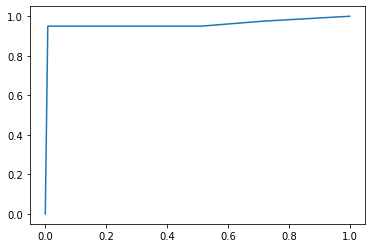

AUC: 95.93%


In [40]:
from sklearn.ensemble import RandomForestClassifier

#Initializing the RF object.
RF = RandomForestClassifier(n_estimators=100)

#Fitting the training data.
RF.fit(counts_train,Train_Y)


#First print the scores for 10-fold cross validation on the training dataset.



print("Printing scores for 10-fold cross validation.")

cv = np.mean(cross_val_score(RF, counts_train, Train_Y, cv=10, scoring = 'accuracy'))
print ("Average accuracy using Random Forests with 10-fold cross validation : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, counts_train, Train_Y, cv=10, scoring = 'precision_weighted'))
print ("Average accuracy using Random Forests with 10-fold cross validation and precision : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, counts_train, Train_Y, cv=10, scoring = 'recall_weighted'))
print ("Average accuracy using Random Forests with 10-fold cross validation and recall : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, counts_train, Train_Y, cv=10, scoring = 'f1_weighted'))
print ("Average accuracy using Random Forests with 10-fold cross validation and f1 measure: {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, counts_train, Train_Y, cv=10, scoring = 'roc_auc_ovr_weighted'))
print ("Average accuracy using Random Forests with 10-fold cross validation and roc score : {}%".format(round(cv*100,2)))


#Predict the labels on the test set.
predictions_RF = RF.predict(counts_test)


#Now print the scores for the predictions on the test set.

print("\n")
print("Printing scores for predictions on the test set.")

acc_score_test = accuracy_score(Test_Y, predictions_RF)
print ("Average accuracy using Random Forests: {}%".format(round(acc_score_test*100,2)))

prec_score_test = precision_score(Test_Y, predictions_RF, average = 'weighted')
print ("Average accuracy using Random Forests and precision : {}%".format(round(prec_score_test*100,2)))

rec_score_test = recall_score(Test_Y, predictions_RF, average = 'weighted')
print ("Average accuracy using Random Forests and recall : {}%".format(round(rec_score_test*100,2)))

f1_score_test = f1_score(Test_Y, predictions_RF, average = 'weighted')
print ("Average accuracy using Random Forests and f1 measure: {}%".format(round(f1_score_test*100,2)))


print("ROC plot for the predictions:")

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_RF, pos_label=4)

plt.plot(fpr,tpr)
plt.show() 

auc = np.trapz(tpr,fpr)
print('AUC: {}%'.format(round(auc*100,2))) 


#Saving the scores for comparisons in Question 3.
acc_score_test_cnt1 = acc_score_test
prec_score_test_cnt1 = prec_score_test
rec_score_test_cnt1 = rec_score_test
f1_score_test_cnt1 =  f1_score_test
fpr_cnt1, tpr_cnt1 = fpr, tpr


#  

# Classifier 3: Naive Bayes

# TF-IDF representation

Printing scores for 10-fold cross validation.
Average accuracy using Naive Bayes with 10-fold cross validation : 94.94%
Average accuracy using Naive Bayes with 10-fold cross validation and precision : 95.23%
Average accuracy using Naive Bayes with 10-fold cross validation and recall : 94.94%
Average accuracy using Naive Bayes with 10-fold cross validation and f1 measure: 94.84%
Average accuracy using Naive Bayes with 10-fold cross validation and roc score : 99.82%


Printing scores for predictions on the test set.
Average accuracy using Naive Bayes: 94.83%
Average accuracy using Naive Bayes and precision : 95.05%
Average accuracy using Naive Bayes and recall : 94.83%
Average accuracy using Naive Bayes and f1 measure: 94.74%
ROC plot for the predictions:


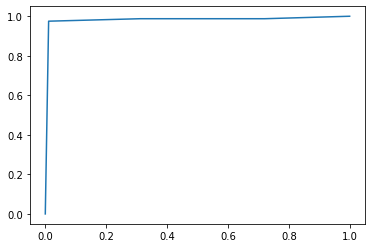

AUC: 98.19%


In [9]:
from sklearn import naive_bayes

#Initializing the NB object.
Bayes = naive_bayes.MultinomialNB()

#Fitting the training data.
Bayes.fit(tfs_train,Train_Y)

#First print the scores for 10-fold cross validation on the training dataset.

print("Printing scores for 10-fold cross validation.")

cv = np.mean(cross_val_score(Bayes, tfs_train, Train_Y, cv=10))
print ("Average accuracy using Naive Bayes with 10-fold cross validation : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, tfs_train, Train_Y, cv=10, scoring = 'precision_weighted'))
print ("Average accuracy using Naive Bayes with 10-fold cross validation and precision : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, tfs_train, Train_Y, cv=10, scoring = 'recall_weighted'))
print ("Average accuracy using Naive Bayes with 10-fold cross validation and recall : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, tfs_train, Train_Y, cv=10, scoring = 'f1_weighted'))
print ("Average accuracy using Naive Bayes with 10-fold cross validation and f1 measure: {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, tfs_train, Train_Y, cv=10, scoring = 'roc_auc_ovr_weighted'))
print ("Average accuracy using Naive Bayes with 10-fold cross validation and roc score : {}%".format(round(cv*100,2)))

#Predict the labels on the test set.
predictions_Bayes = Bayes.predict(tfs_test)

#Now print the scores for the predictions on the test set.

print("\n")
print("Printing scores for predictions on the test set.")

acc_score_test = accuracy_score(Test_Y, predictions_Bayes)
print ("Average accuracy using Naive Bayes: {}%".format(round(acc_score_test*100,2)))

prec_score_test = precision_score(Test_Y, predictions_Bayes, average = 'weighted')
print ("Average accuracy using Naive Bayes and precision : {}%".format(round(prec_score_test*100,2)))

rec_score_test = recall_score(Test_Y, predictions_Bayes, average = 'weighted')
print ("Average accuracy using Naive Bayes and recall : {}%".format(round(rec_score_test*100,2)))

f1_score_test = f1_score(Test_Y, predictions_Bayes, average = 'weighted')
print ("Average accuracy using Naive Bayes and f1 measure: {}%".format(round(f1_score_test*100,2)))


print("ROC plot for the predictions:")

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_Bayes, pos_label=4)

plt.plot(fpr,tpr)
plt.show() 

auc = np.trapz(tpr,fpr)
print('AUC: {}%'.format(round(auc*100,2))) 

# Bag of words representation

Printing scores for 10-fold cross validation.
Average accuracy using Naive Bayes with 10-fold cross validation : 97.58%
Average accuracy using Naive Bayes with 10-fold cross validation and precision : 97.69%
Average accuracy using Naive Bayes with 10-fold cross validation and recall : 97.58%
Average accuracy using Naive Bayes with 10-fold cross validation and f1 measure: 97.59%
Average accuracy using Naive Bayes with 10-fold cross validation and roc score : 99.69%


Printing scores for predictions on the test set.
Average accuracy using Naive Bayes: 97.53%
Average accuracy using Naive Bayes and precision : 97.61%
Average accuracy using Naive Bayes and recall : 97.53%
Average accuracy using Naive Bayes and f1 measure: 97.53%
ROC plot for the predictions:


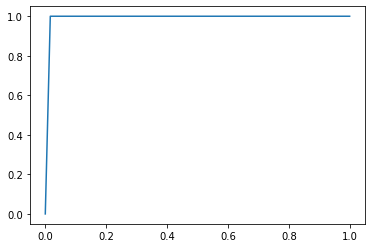

AUC: 99.18%


In [10]:
#Initializing the NB object.
Bayes = naive_bayes.MultinomialNB()

#Fitting the training data.
Bayes.fit(counts_train,Train_Y)

#First print the scores for 10-fold cross validation on the training dataset.

print("Printing scores for 10-fold cross validation.")

cv = np.mean(cross_val_score(Bayes, counts_train, Train_Y, cv=10))
print ("Average accuracy using Naive Bayes with 10-fold cross validation : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, counts_train, Train_Y, cv=10, scoring = 'precision_weighted'))
print ("Average accuracy using Naive Bayes with 10-fold cross validation and precision : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, counts_train, Train_Y, cv=10, scoring = 'recall_weighted'))
print ("Average accuracy using Naive Bayes with 10-fold cross validation and recall : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, counts_train, Train_Y, cv=10, scoring = 'f1_weighted'))
print ("Average accuracy using Naive Bayes with 10-fold cross validation and f1 measure: {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, counts_train, Train_Y, cv=10, scoring = 'roc_auc_ovr_weighted'))
print ("Average accuracy using Naive Bayes with 10-fold cross validation and roc score : {}%".format(round(cv*100,2)))

#Predict the labels on the test set.
predictions_Bayes = Bayes.predict(counts_test)

#Now print the scores for the predictions on the test set.

print("\n")
print("Printing scores for predictions on the test set.")

acc_score_test = accuracy_score(Test_Y, predictions_Bayes)
print ("Average accuracy using Naive Bayes: {}%".format(round(acc_score_test*100,2)))

prec_score_test = precision_score(Test_Y, predictions_Bayes, average = 'weighted')
print ("Average accuracy using Naive Bayes and precision : {}%".format(round(prec_score_test*100,2)))

rec_score_test = recall_score(Test_Y, predictions_Bayes, average = 'weighted')
print ("Average accuracy using Naive Bayes and recall : {}%".format(round(rec_score_test*100,2)))

f1_score_test = f1_score(Test_Y, predictions_Bayes, average = 'weighted')
print ("Average accuracy using Naive Bayes and f1 measure: {}%".format(round(f1_score_test*100,2)))


print("ROC plot for the predictions:")

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_Bayes, pos_label=4)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC: {}%'.format(round(auc*100,2))) 

# Classifier 4: Custom K-Nearest Neighbors 

# Defining the KNN class 

In [11]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
import pandas as pd
import math
import csv
import random
import operator
import numpy as np

import random

from sklearn.metrics.pairwise import euclidean_distances

#Defining a custom function for the euclidean distance.
def euclidean_distance(array1,array2):
    
    distance = 0
    
    for x in range(len(array1)-1):
        distance += pow((array1[x] - array2[x]),2)
    return math.sqrt(distance)

class K_Nearest_Neighbors():
    
    #Passing the k and train_reduce arguments (train_reduce will be explained later on)
    def __init__(self,k_arg, train_reduce):
        
        self.k = k_arg
        self.train_reduce = train_reduce
    
    #Fitting the training data.
    def fit(self, train_arg, labels):
    
        #Getting the number of our labels and the categories
        self.cat_count = len(set(labels))
        self.categories = labels
    
        #In order to reduce the length of the training set, we will use the train_reduce field to pick only a certain number of rows for each category.
        self.training = []
        X_train_array = train_arg.toarray()
            
        #Making sure that k is smaller than the length of the training set that will be calculated later on. 
        #For example, if we have 5 rows for each category, k cannot be larger than 25.    
        if(self.k > self.train_reduce*self.cat_count):
            print("Invalid parameters!")
            return
        
        #Creating the training set.
        for cat_index in range(self.cat_count):
            
            reduce_counter = 0
            
            #Picking only N = train_reduce rows for each category.
            while(reduce_counter < self.train_reduce):
                
                #Using a random number from the length of the entire X_train_array.
                r = random.randint(1,len(X_train_array)-1)
                
                #If it's a valid category number, add the corresponding row of X_train_array and its category to the training set.
                if(self.categories[r] == cat_index):
                    self.training.append((X_train_array[r],self.categories[r]))
                    reduce_counter += 1       
        
    #Predicting on the test_set    
    def predict(self, test_arg):
        
        X_test_array = test_arg.toarray()
        
        #Initializing an array for the distances and one for the predictions.
        distances = []
        predictions = []
        
        #For every item in the X_test_array
        for test_index in range(len(X_test_array)):
            
            #For every item of our training set
            for train_index in range(len(self.training)):
                
                #Get the corresponding euclidean distance and add it in the distances array.
                distance = euclidean_distance(X_test_array[test_index],self.training[train_index][0])
                distances.append((self.training[train_index][1],distance))

            #Sort the distances to get the smallest ones first.    
            distances.sort(key=operator.itemgetter(1))

            #Select k smallest distances and add them in the neighbors array.
            neighbors = []
            for k_index in range(self.k):
                neighbors.append(distances[k_index])

            #Majority voting    
            votes_dict = {}
            for index in range (0,len(neighbors)):
                
                #Getting the category of the neighbor
                vote = neighbors[index][0]

                #If the category is in the dictionary increment its value, otherwise set it to 1.
                if vote in votes_dict:
                    votes_dict[vote] += 1
                else:
                    votes_dict[vote] = 1

                    
            #Sort the dictionary to get the most votes first.        
            sorted_votes = sorted(votes_dict.items(),key=operator.itemgetter(1),reverse=True)
            
            #Add the category with the most votes in the predictions array.
            predictions.append(sorted_votes[0][0])
            
            
        return predictions        

#In order to create the KNN class we mainly used the following link for information:    
#https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

# TF-IDF representation



Printing scores for predictions on the test set.
Average accuracy using K-Nearest Neighbors: 20.0%
Average accuracy using K-Nearest Neighbors and precision : 7.39%
Average accuracy using K-Nearest Neighbors and recall : 20.0%
Average accuracy using K-Nearest Neighbors and f1 measure: 10.72%
ROC plot for the predictions:


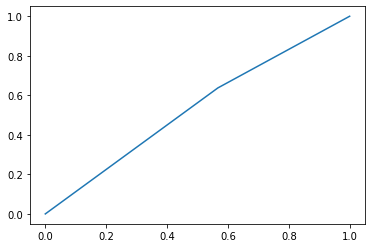

AUC: 53.52%


In [12]:
#Initializing the KNN object.

k = 7
train_reduce = 2
KNN = K_Nearest_Neighbors(k,train_reduce)

#Fitting the training data.
KNN.fit(tfs_train,Train_Y)

#Getting the predictions of the test set.
knn_preds = KNN.predict(tfs_test)

#Now print the scores for the predictions on the test set.

print("\n")
print("Printing scores for predictions on the test set.")

acc_score_test = accuracy_score(Test_Y, knn_preds)
print ("Average accuracy using K-Nearest Neighbors: {}%".format(round(acc_score_test*100,2)))

prec_score_test = precision_score(Test_Y, knn_preds, average = 'weighted',zero_division = 0)
print ("Average accuracy using K-Nearest Neighbors and precision : {}%".format(round(prec_score_test*100,2)))

rec_score_test = recall_score(Test_Y, knn_preds, average = 'weighted')
print ("Average accuracy using K-Nearest Neighbors and recall : {}%".format(round(rec_score_test*100,2)))

f1_score_test = f1_score(Test_Y, knn_preds, average = 'weighted')
print ("Average accuracy using K-Nearest Neighbors and f1 measure: {}%".format(round(f1_score_test*100,2)))

print("ROC plot for the predictions:")

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, knn_preds, pos_label=4)

plt.plot(fpr,tpr)
plt.show() 

auc = np.trapz(tpr,fpr)
print('AUC: {}%'.format(round(auc*100,2))) 




# Bag of words representation



Printing scores for predictions on the test set.
Average accuracy using K-Nearest Neighbors: 23.82%
Average accuracy using K-Nearest Neighbors and precision : 11.62%
Average accuracy using K-Nearest Neighbors and recall : 23.82%
Average accuracy using K-Nearest Neighbors and f1 measure: 12.33%
ROC plot for the predictions:


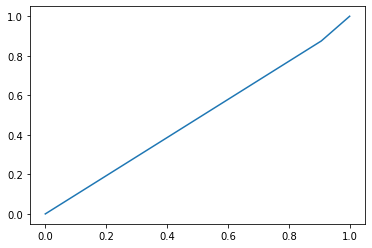

AUC: 48.41%


In [13]:
#Initializing the KNN object.

k = 7
train_reduce = 2
KNN = K_Nearest_Neighbors(k,train_reduce)

#Fitting the training data.
KNN.fit(counts_train,Train_Y)

#Getting the predictions of the test set.
knn_preds = KNN.predict(counts_test)

#Now print the scores for the predictions on the test set.

print("\n")
print("Printing scores for predictions on the test set.")

acc_score_test = accuracy_score(Test_Y, knn_preds)
print ("Average accuracy using K-Nearest Neighbors: {}%".format(round(acc_score_test*100,2)))

prec_score_test = precision_score(Test_Y, knn_preds, average = 'weighted',zero_division = 0 )
print ("Average accuracy using K-Nearest Neighbors and precision : {}%".format(round(prec_score_test*100,2)))

rec_score_test = recall_score(Test_Y, knn_preds, average = 'weighted')
print ("Average accuracy using K-Nearest Neighbors and recall : {}%".format(round(rec_score_test*100,2)))

f1_score_test = f1_score(Test_Y, knn_preds, average = 'weighted')
print ("Average accuracy using K-Nearest Neighbors and f1 measure: {}%".format(round(f1_score_test*100,2)))

print("ROC plot for the predictions:")

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, knn_preds, pos_label=4)

plt.plot(fpr,tpr)
plt.show() 

auc = np.trapz(tpr,fpr)
print('AUC: {}%'.format(round(auc*100,2))) 

#  

# Question 3: Beat the benchmark

# Preprocessing our data

In [18]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


#Adding stop words in our data.
our_words = {'said', 'say', 'will','just', 'yes', 'don', 'didn'}
our_stopwords = ENGLISH_STOP_WORDS.union(our_words)


#Adding 5 times the title of the article in to the content to give the title more weight.
for idx, row in train_df.iterrows():
    train_df.loc[idx,'content'] = row.title*5 + row.content
    

#Initializing the vectorizers again, with the new data.
tfidf = TfidfVectorizer(stop_words = our_stopwords)
tfs_train = tfidf.fit_transform(train_df['content'])
tfs_test = tfidf.transform(test_df['content'])

count_vectorizer = CountVectorizer(stop_words = our_stopwords)
counts_train = count_vectorizer.fit_transform(train_df['content'])
counts_test = count_vectorizer.transform(test_df['content'])

# TF-IDF representation

Original scores for predictions on the test set.
Average accuracy using Random Forests: 97.08%
Average accuracy using Random Forests and precision : 97.13%
Average accuracy using Random Forests and recall : 97.08%
Average accuracy using Random Forests and f1 measure: 97.08%
ROC plot for the predictions:


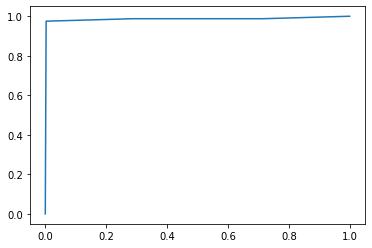

AUC: 98.61%


New scores for predictions on the test set with pre-processing.
Average accuracy using Random Forests: 97.53%
Average accuracy using Random Forests and precision : 97.56%
Average accuracy using Random Forests and recall : 97.53%
Average accuracy using Random Forests and f1 measure: 97.53%
ROC plot for the predictions:


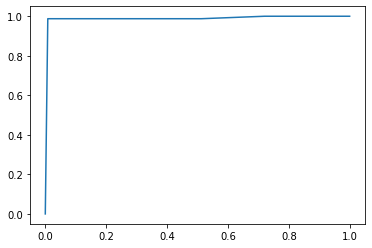

AUC: 98.82%


In [36]:
#Using the Random Forests classifier.
RF = RandomForestClassifier(n_estimators=100)
RF.fit(tfs_train,Train_Y)

predictions_RF = RF.predict(tfs_test)


print("Original scores for predictions on the test set.")

print ("Average accuracy using Random Forests: {}%".format(round(acc_score_test_tfs1*100,2)))

print ("Average accuracy using Random Forests and precision : {}%".format(round(prec_score_test_tfs1*100,2)))

print ("Average accuracy using Random Forests and recall : {}%".format(round(rec_score_test_tfs1*100,2)))

print ("Average accuracy using Random Forests and f1 measure: {}%".format(round(f1_score_test_tfs1*100,2)))

print("ROC plot for the predictions:")
plt.plot(fpr_tfs1,tpr_tfs1)
plt.show() 

auc = np.trapz(tpr_tfs1,fpr_tfs1)
print('AUC: {}%'.format(round(auc*100,2))) 


print("\n")
print("New scores for predictions on the test set with pre-processing.")

acc_score_test = accuracy_score(Test_Y, predictions_RF)
print ("Average accuracy using Random Forests: {}%".format(round(acc_score_test*100,2)))

prec_score_test = precision_score(Test_Y, predictions_RF, average = 'weighted')
print ("Average accuracy using Random Forests and precision : {}%".format(round(prec_score_test*100,2)))

rec_score_test = recall_score(Test_Y, predictions_RF, average = 'weighted')
print ("Average accuracy using Random Forests and recall : {}%".format(round(rec_score_test*100,2)))

f1_score_test = f1_score(Test_Y, predictions_RF, average = 'weighted')
print ("Average accuracy using Random Forests and f1 measure: {}%".format(round(f1_score_test*100,2)))


print("ROC plot for the predictions:")

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_RF, pos_label=4)

plt.plot(fpr,tpr)
plt.show() 

auc = np.trapz(tpr,fpr)
print('AUC: {}%'.format(round(auc*100,2))) 


# Bag of words representation

Original scores for predictions on the test set.
Average accuracy using Random Forests: 96.85%
Average accuracy using Random Forests and precision : 96.9%
Average accuracy using Random Forests and recall : 96.85%
Average accuracy using Random Forests and f1 measure: 96.86%
ROC plot for the predictions:


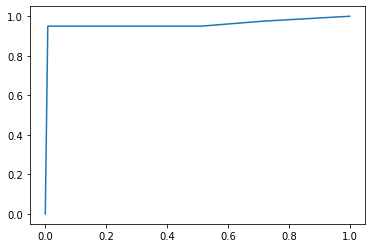

AUC: 95.93%


New scores for predictions on the test set .
Average accuracy using Random Forests: 97.08%
Average accuracy using Random Forests and precision : 97.08%
Average accuracy using Random Forests and recall : 97.08%
Average accuracy using Random Forests and f1 measure: 97.08%
ROC plot for the predictions:


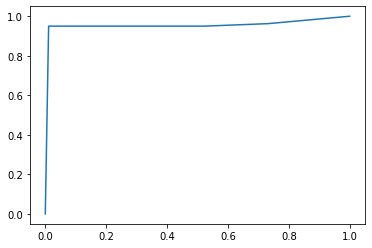

AUC: 95.45%


In [41]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(counts_train,Train_Y)

predictions_RF = RF.predict(counts_test)

print("Original scores for predictions on the test set.")

print ("Average accuracy using Random Forests: {}%".format(round(acc_score_test_cnt1*100,2)))

print ("Average accuracy using Random Forests and precision : {}%".format(round(prec_score_test_cnt1*100,2)))

print ("Average accuracy using Random Forests and recall : {}%".format(round(rec_score_test_cnt1*100,2)))

print ("Average accuracy using Random Forests and f1 measure: {}%".format(round(f1_score_test_cnt1*100,2)))


print("ROC plot for the predictions:")

plt.plot(fpr_cnt1,tpr_cnt1)
plt.show() 

auc = np.trapz(tpr_cnt1,fpr_cnt1)
print('AUC: {}%'.format(round(auc*100,2))) 


print("\n")
print("New scores for predictions on the test set .")

acc_score_test = accuracy_score(Test_Y, predictions_RF)
print ("Average accuracy using Random Forests: {}%".format(round(acc_score_test*100,2)))

prec_score_test = precision_score(Test_Y, predictions_RF, average = 'weighted')
print ("Average accuracy using Random Forests and precision : {}%".format(round(prec_score_test*100,2)))

rec_score_test = recall_score(Test_Y, predictions_RF, average = 'weighted')
print ("Average accuracy using Random Forests and recall : {}%".format(round(rec_score_test*100,2)))

f1_score_test = f1_score(Test_Y, predictions_RF, average = 'weighted')
print ("Average accuracy using Random Forests and f1 measure: {}%".format(round(f1_score_test*100,2)))


print("ROC plot for the predictions:")

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_RF, pos_label=4)

plt.plot(fpr,tpr)
plt.show() 

auc = np.trapz(tpr,fpr)
print('AUC: {}%'.format(round(auc*100,2))) 

#  

# Question 4: Clustering 

# Bag of words representation

In [44]:
from sklearn import preprocessing  
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import gensim 
from gensim.models import Word2Vec 
from nltk.cluster import KMeansClusterer
from nltk.cluster.util import cosine_distance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Using the KMeansClusterer function from the ntlk library to perform clustering
#KMeansClusterer also supports the use of the cosine distance which is required for this question.
clusters_number = 5
kclusterer = KMeansClusterer(clusters_number,  distance= cosine_distance, repeats=50)

assigned_clusters = kclusterer.cluster(counts_train.toarray(), assign_clusters=True)

#We decided not to plot the clusters for the bag of words representation since it would've taken up too much space.
#So we're moving to the TF-IDF representation, which is pretty much a similar representation.

# TF-IDF representation

In [45]:
#Performing clustering on the TF-IDF representation and getting its clusters.

clusters_number = 5
kclusterer = KMeansClusterer(clusters_number,  distance= cosine_distance, repeats=50)

assigned_clusters = kclusterer.cluster(tfs_train.toarray(), assign_clusters=True)

# PCA reduction

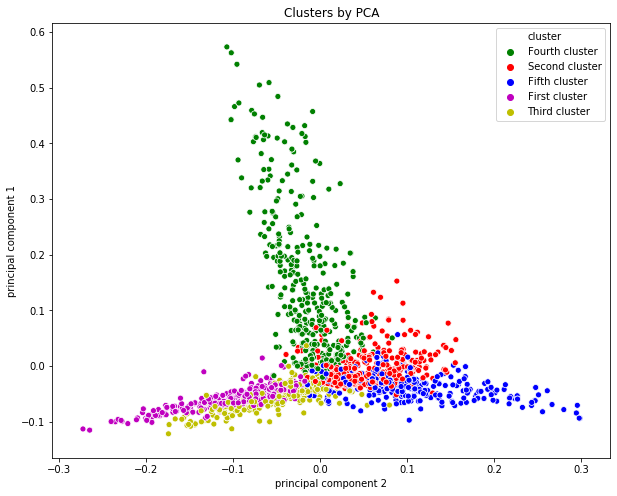

In [46]:
#Performing PCA reduction on our data.

pca = PCA(n_components=2)
pca = pca.fit_transform(tfs_train.toarray())

#Using a dataframe for the plot.
principalDf = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])

#Adding the labels.
principalDf['category'] = Train_Y
principalDf['Categories'] = principalDf['category'].map({0:'politics',1:'entertainment',2:'sport',3:'business',4:'tech'})

#Adding the clusters.
principalDf['targets'] = assigned_clusters
principalDf['cluster'] = principalDf['targets'].map({0:'First cluster',1:'Second cluster',2:'Third cluster',3:'Fourth cluster',4:'Fifth cluster'})

#Plotting our data.
x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cluster'],palette=['g','r','b','m','y'])
plt.title('Clusters by PCA')
plt.show()


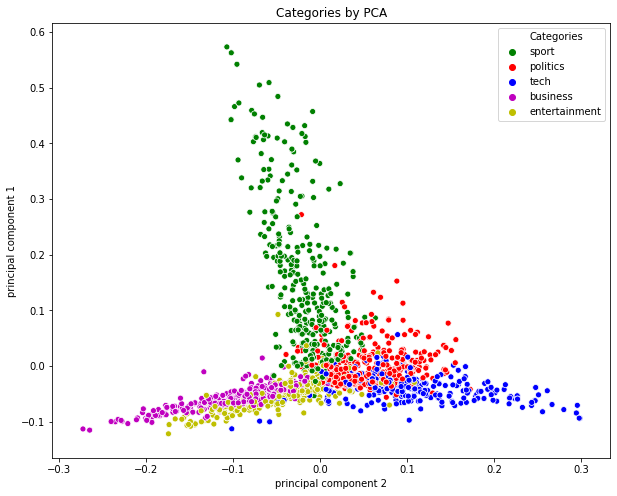

In [47]:
#Plotting the categories for comparison.

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,hue=principalDf['Categories'],palette=['g','r','b','m','y'])
plt.title('Categories by PCA')
plt.show()

# SVD reduction

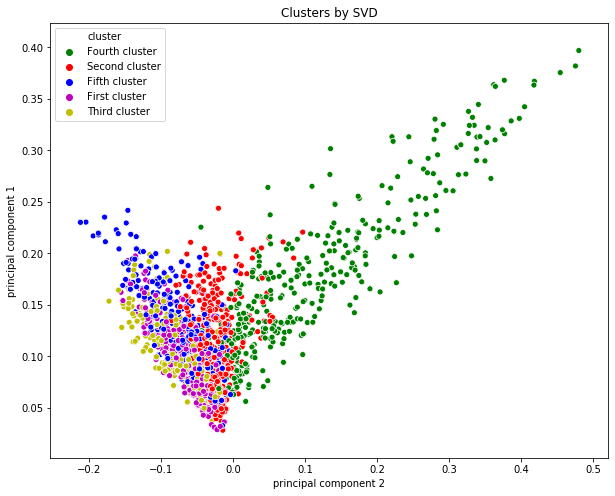

In [52]:
#Performing SVD reduction on our data.

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=0)
matrix_lsi = svd.fit_transform(tfs_train)

#Similar work as in PCA.

principalDf = pd.DataFrame(data = matrix_lsi, columns = ['principal component 1', 'principal component 2'])

principalDf['category'] = Train_Y
principalDf['Categories'] = principalDf['category'].map({0:'politics',1:'entertainment',2:'sport',3:'business',4:'tech'})

principalDf['targets'] = assigned_clusters
principalDf['cluster'] = principalDf['targets'].map({0:'First cluster',1:'Second cluster',2:'Third cluster',3:'Fourth cluster',4:'Fifth cluster'})
#principalDf['category'] = df['category']

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cluster'],palette=['g','r','b','m','y'])
plt.title('Clusters by SVD')
plt.show()


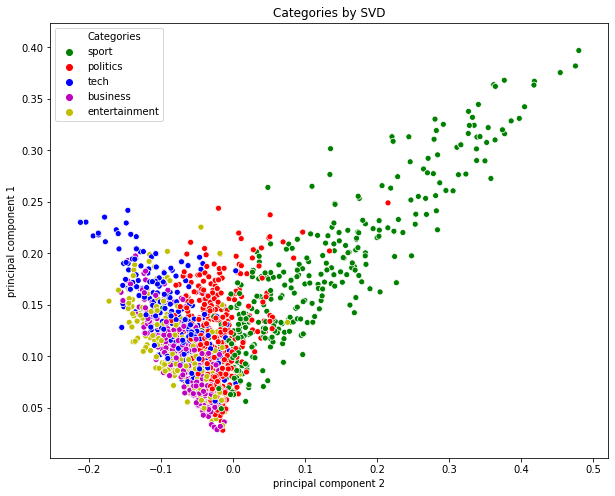

In [49]:
#Plotting the categories for comparison.

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,hue=principalDf['Categories'],palette=['g','r','b','m','y'])
plt.title('Categories by SVD')
plt.show()

# ICA reduction

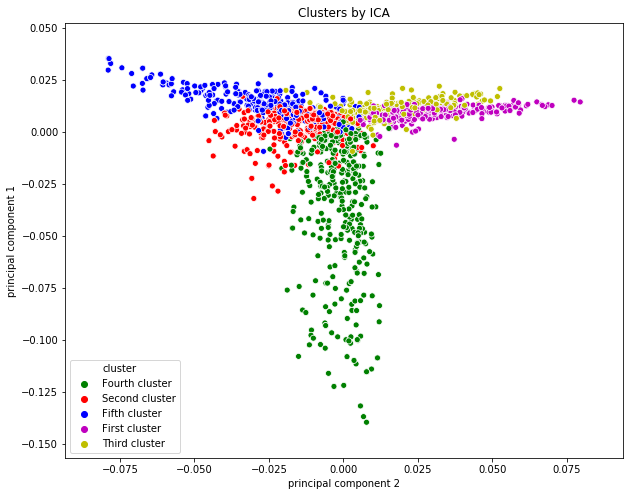

In [53]:
#Performing ICA reduction on our data.

from sklearn.decomposition import FastICA
transformer = FastICA(n_components=2, random_state=0)
matrix_ica = transformer.fit_transform(tfs_train.toarray())

#Same work as with the previous reductions.

principalDf = pd.DataFrame(data = matrix_ica, columns = ['principal component 1', 'principal component 2'])

principalDf['category'] = Train_Y
principalDf['Categories'] = principalDf['category'].map({0:'politics',1:'entertainment',2:'sport',3:'business',4:'tech'})

principalDf['targets'] = assigned_clusters
principalDf['cluster'] = principalDf['targets'].map({0:'First cluster',1:'Second cluster',2:'Third cluster',3:'Fourth cluster',4:'Fifth cluster'})

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cluster'],palette=['g','r','b','m','y'])
plt.title('Clusters by ICA')
plt.show()


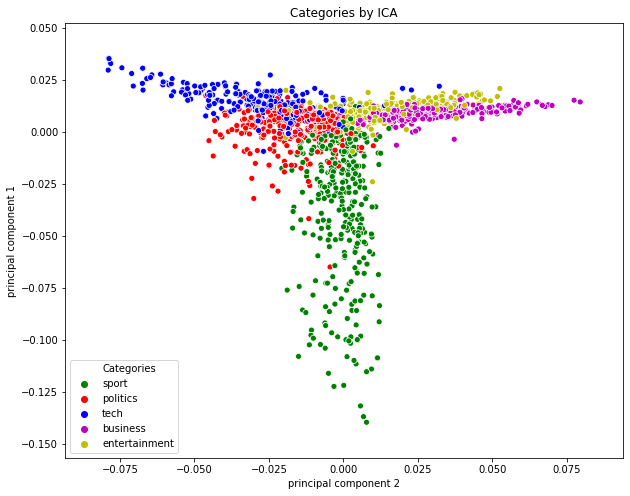

In [54]:
x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,hue=principalDf['Categories'],palette=['g','r','b','m','y'])
plt.title('Categories by ICA')
plt.show()

# Document embeddings representation

# Generating the document-embeddings array

In [56]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from gensim.models import KeyedVectors
import gensim 
from gensim.models import Word2Vec 

#We will use a dataframe which will contain every word and the category it belongs to.
df = pd.DataFrame(columns=['category', 'word'])

#Getting each word for each category and adding it to the dataframe
categories = train_df.category.unique()
for category in categories:
    
    #Adding all the contents to a string.
    article_contents = train_df[train_df.category == category].content
    contents_list = [contents for contents in article_contents]    
    big_string = ' '.join(contents_list)    
    
    
    #Tokenizing the big string into words.
    tokens = word_tokenize(big_string)

    #Removing non-alphabetic tokens, such as punctuation.
    words = [word.lower() for word in tokens if word.isalpha()]

    #Filtering out stopwords.
    stop_words = set(stopwords.words('english'))

    #Getting a list of our words.
    words = [word for word in words if not word in stop_words]
    
    #Adding each word to the dataframe.
    for word in words:
        df = df.append({'category': category, 'word': word }, ignore_index=True)
    
    

#Getting a list of the words which will be passed into the pre-trained model.
final_words = df['word'].tolist()

#Getting the pre-trained GloVe model. We used a model from the following link: http://nlp.stanford.edu/data/glove.6B.zip
#Also in order to get the format for 'load_word2vec_format function', we executed the following script:
#python -m gensim.scripts.glove2word2vec -i glove.6B.300d.txt -o glove.6B.300d.word2vec.txt
model = KeyedVectors.load_word2vec_format('glove.6B.300d.word2vec.txt', binary = False ) 

#Filtering the list of vectors to include only those that Word2Vec has a vector for.
vector_list = [model[word] for word in final_words if word in model.vocab]

#Creating a list of the words corresponding to these vectors.
words_filtered = [word for word in final_words if word in model.vocab]

#Updating the df to keep only the filtered words.
df = df[df.word.isin(words_filtered)]


# Clustering on document-embeddings

In [61]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import gensim 
from gensim.models import Word2Vec 
from nltk.cluster import KMeansClusterer
from nltk.cluster.util import cosine_distance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Now using the KMeansClusterer function same as before.
clusters_number = 5
kclusterer = KMeansClusterer(clusters_number,  distance= cosine_distance, repeats=5)

#Passing the vector list we created.
assigned_clusters = kclusterer.cluster(vector_list, assign_clusters=True)


# PCA reduction

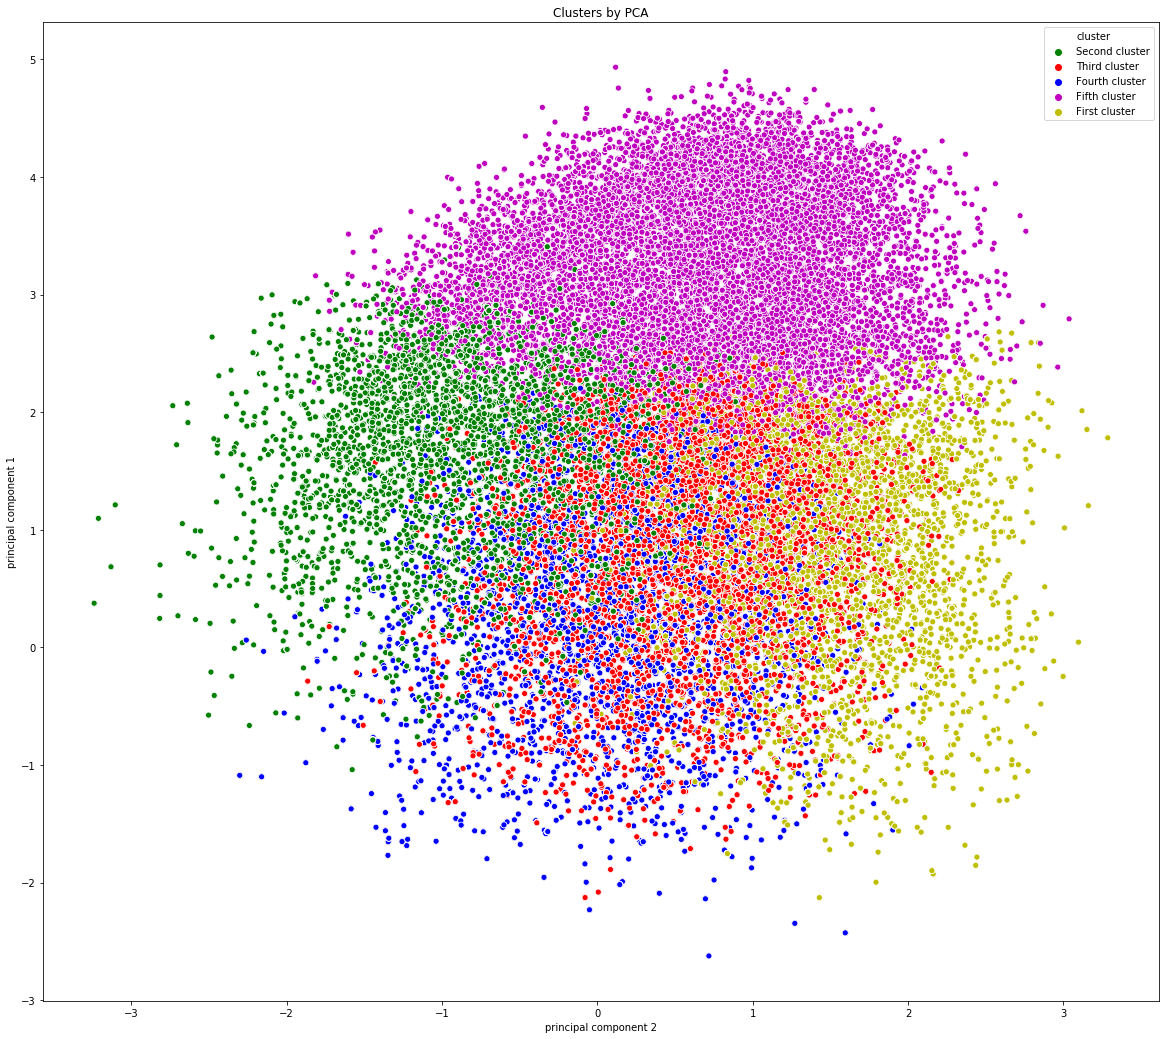

In [62]:
#Using the same reduction techniques, same as before.

pca = PCA(n_components=2)
pca = pca.fit_transform(vector_list)


principalDf = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])

#Getting the category from the dataframe.
principalDf['category'] = df['category']

principalDf['targets'] = assigned_clusters
principalDf['cluster'] = principalDf['targets'].map({0:'First cluster',1:'Second cluster',2:'Third cluster',3:'Fourth cluster',4:'Fifth cluster'})

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cluster'],palette=['g','r','b','m','y'])
plt.title('Clusters by PCA')
plt.show()


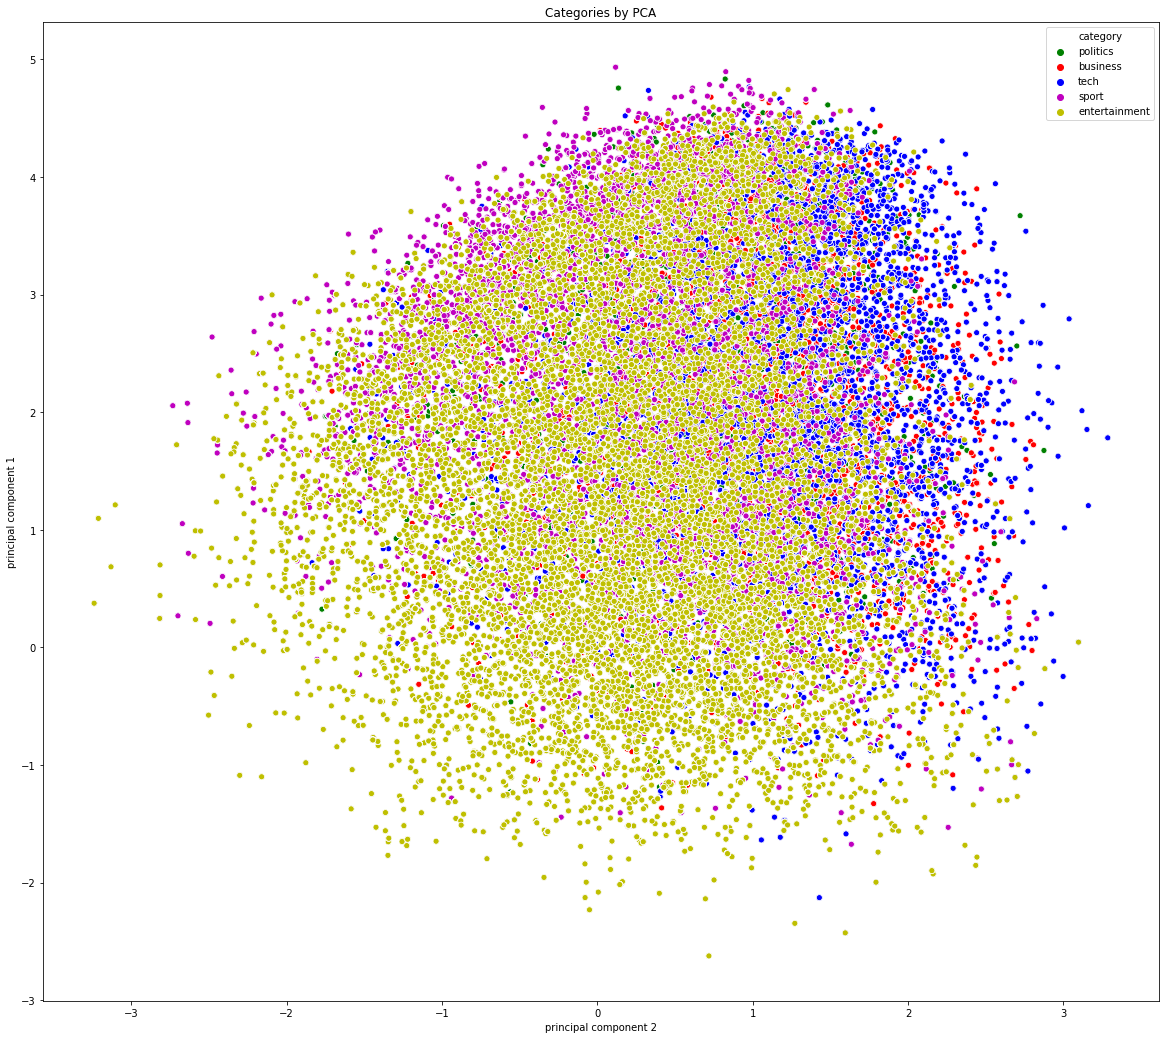

In [63]:
#Plotting the categories for comparison.

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['category'],palette=['g','r','b','m','y'])
plt.title('Categories by PCA')
plt.show()

# SVD reduction

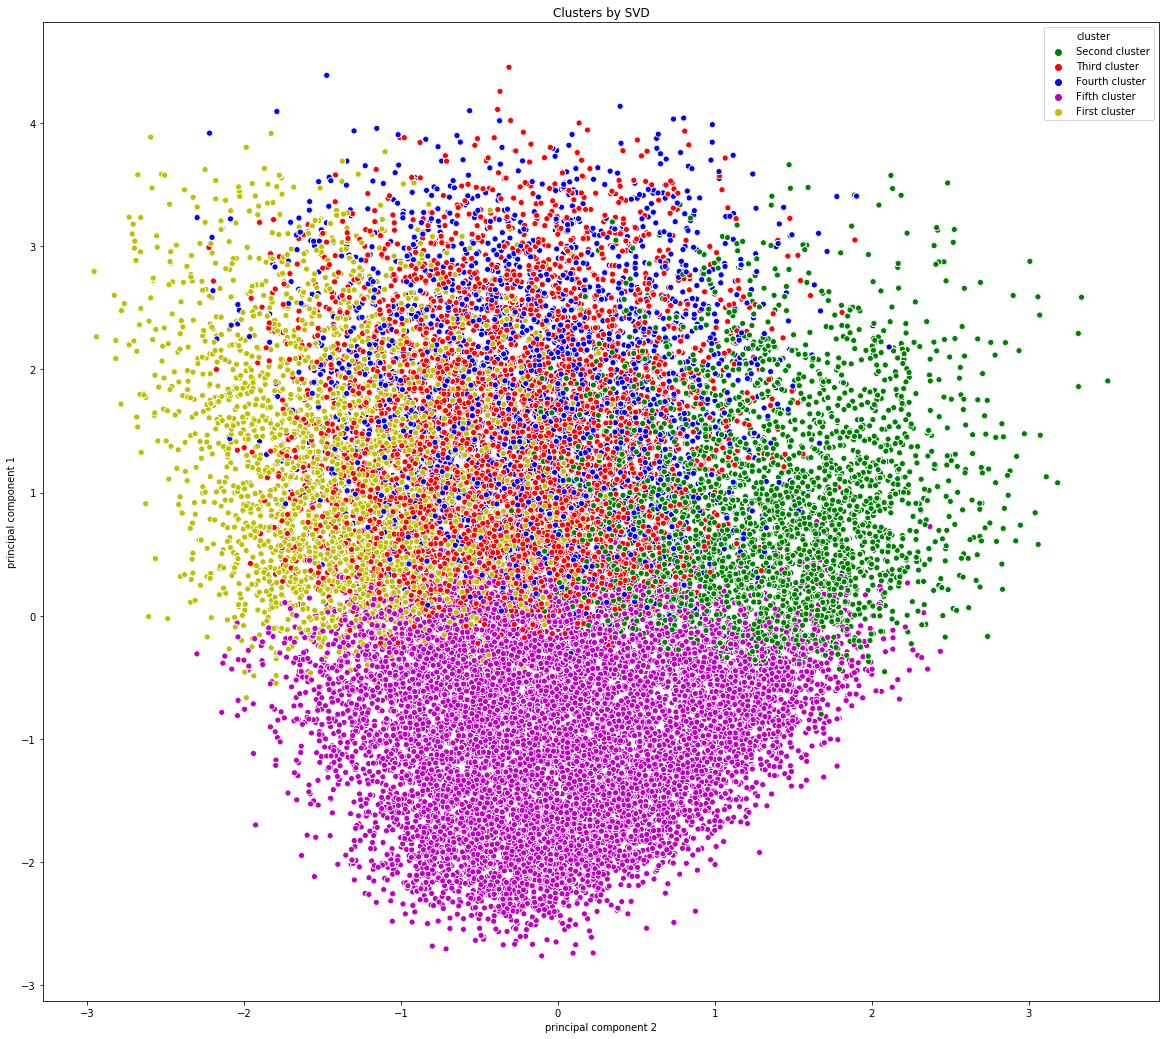

In [65]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=0)
matrix_svd = svd.fit_transform(vector_list)

#SVD reduction, same as before.

principalDf = pd.DataFrame(data = matrix_svd, columns = ['principal component 1', 'principal component 2'])

principalDf['category'] = df['category']

principalDf['targets'] = assigned_clusters
principalDf['cluster'] = principalDf['targets'].map({0:'First cluster',1:'Second cluster',2:'Third cluster',3:'Fourth cluster',4:'Fifth cluster'})

principalDf['category'] = df['category']

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cluster'],palette=['g','r','b','m','y'])
plt.title('Clusters by SVD')
plt.show()


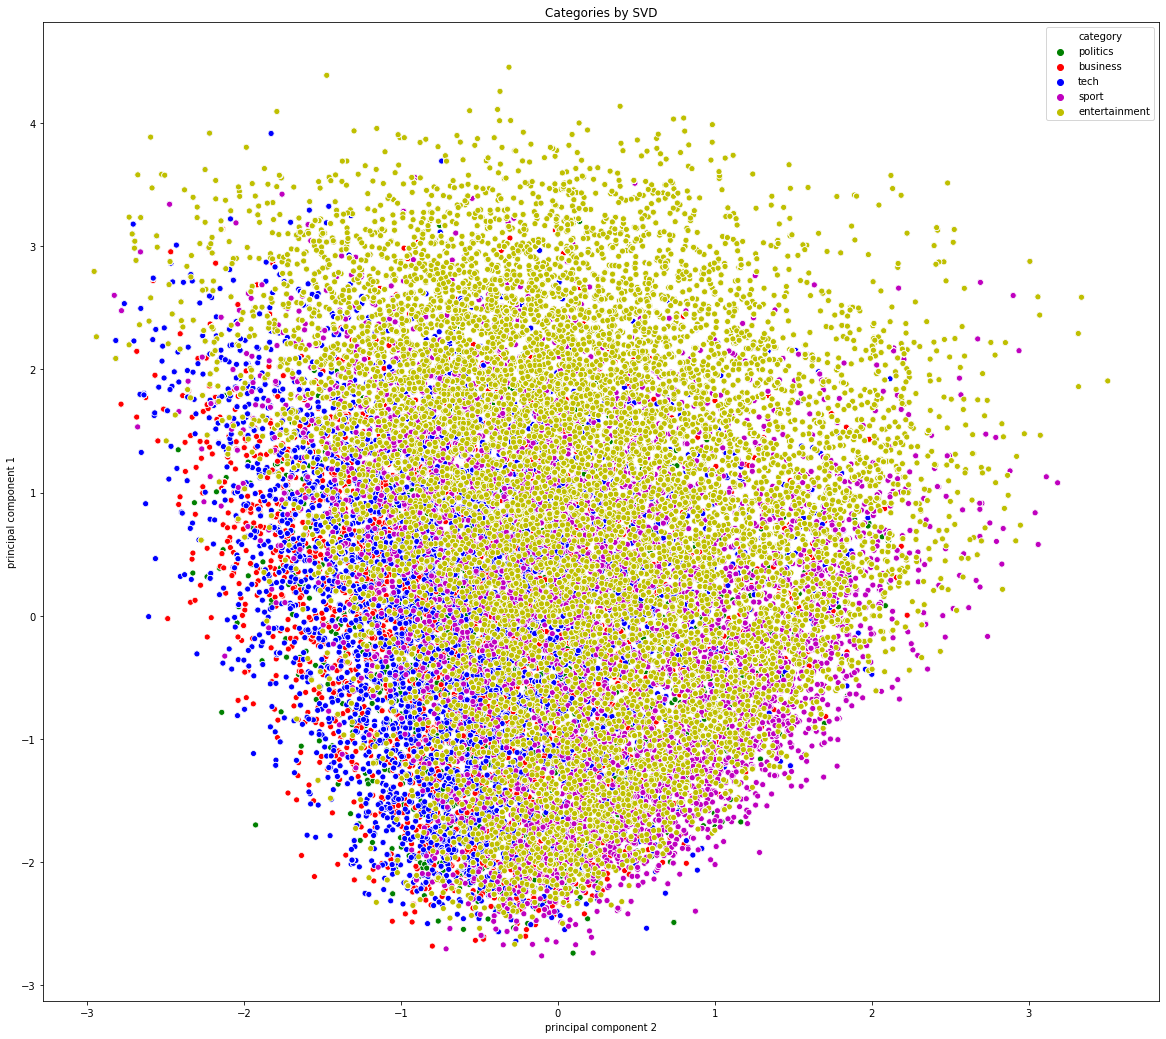

In [66]:
#Plotting the categories for comparison.

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['category'],palette=['g','r','b','m','y'])
plt.title('Categories by SVD')
plt.show()

# ICA reduction

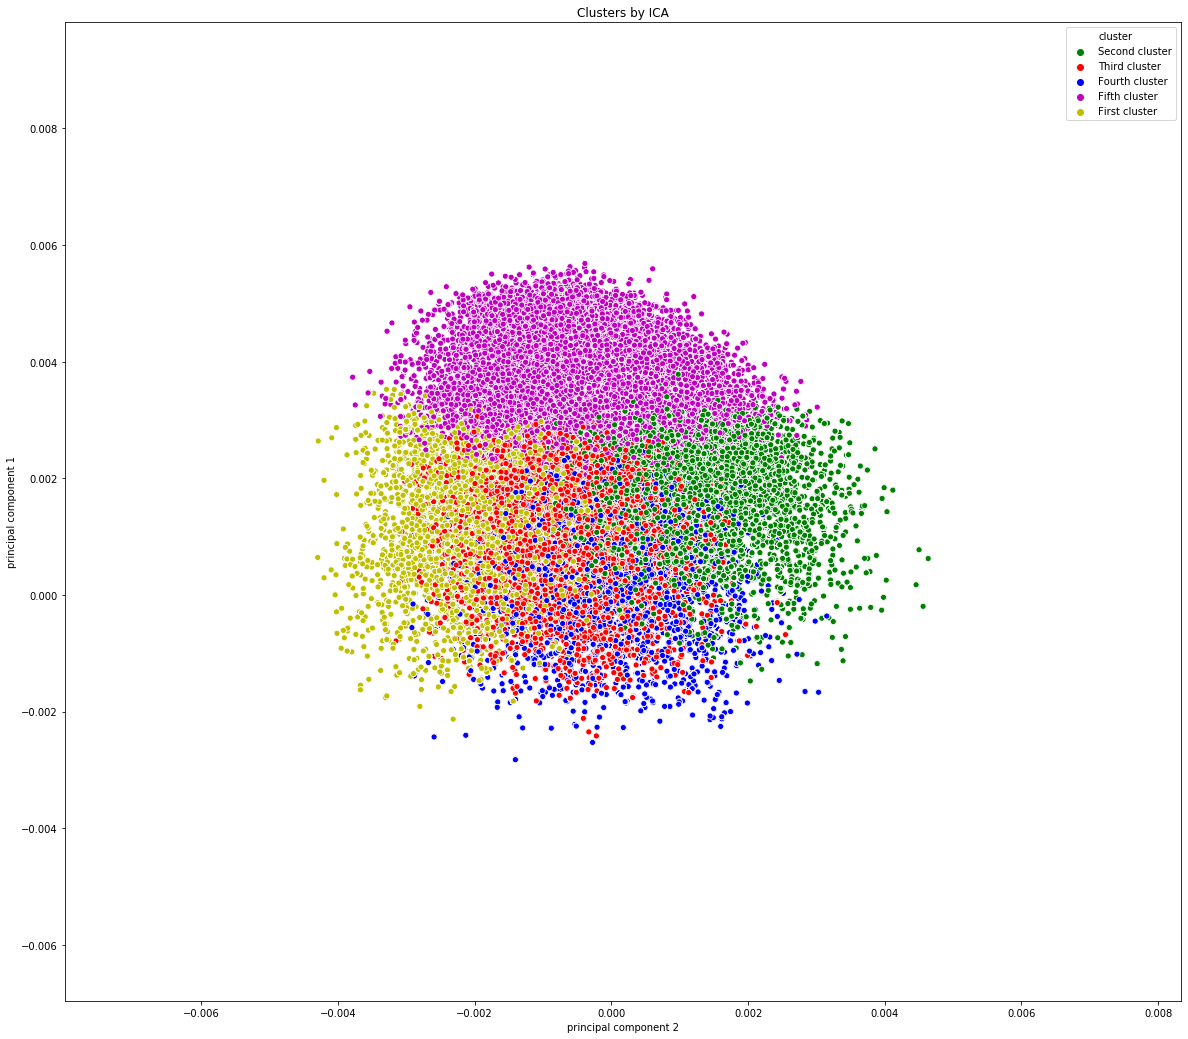

In [67]:
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=2, random_state=0)
matrix_ica = transformer.fit_transform(vector_list)

#ICA reduction, same as before.

principalDf = pd.DataFrame(data = matrix_ica, columns = ['principal component 1', 'principal component 2'])

principalDf['category'] = df['category']

principalDf['targets'] = assigned_clusters
principalDf['cluster'] = principalDf['targets'].map({0:'First cluster',1:'Second cluster',2:'Third cluster',3:'Fourth cluster',4:'Fifth cluster'})

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cluster'],palette=['g','r','b','m','y'])
plt.title('Clusters by ICA')
plt.show()


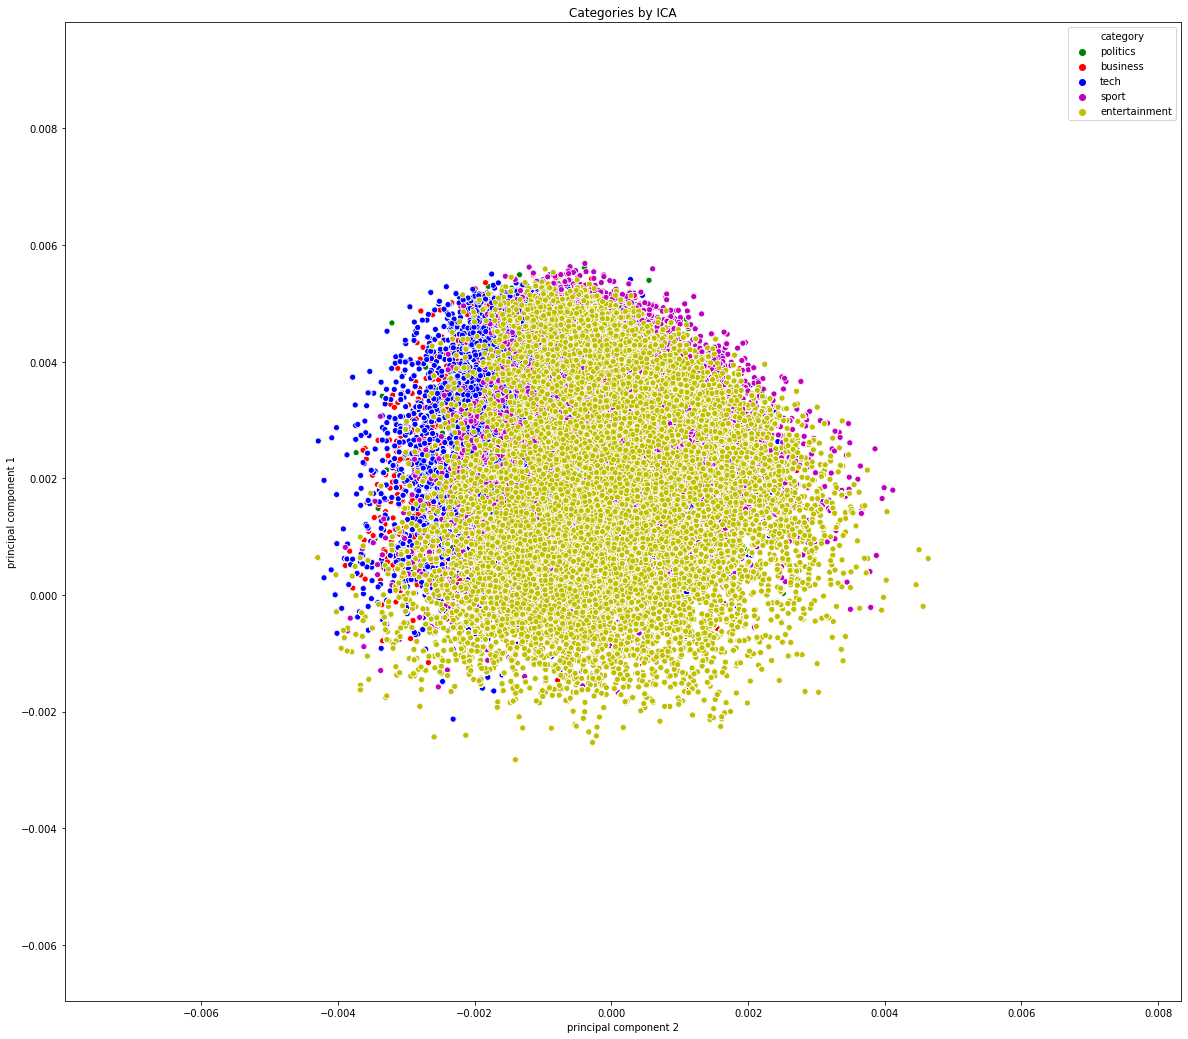

In [69]:
#Plotting the categories for comparison.

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['category'],palette=['g','r','b','m','y'])
plt.title('Categories by ICA')
plt.show()